# Project Topic : Sentiment Analysis of Amazon Reviews Data by Lexicon based analysis method

## Install Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, provides additional wordnet data.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Load the amazon review dataset
df = pd.read_csv("amazon.csv")

In [9]:
df.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [10]:
len(df)

4915

In [11]:
df.shape

(4915, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [13]:
df.dtypes

Unnamed: 0                int64
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [14]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

#  Data Cleaning

In [16]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [17]:
# Find the locations of missing values
missing_values = df.isnull()

print("Missing value locations:")
print(missing_values)


Missing value locations:
      Unnamed: 0  reviewerName  overall  reviewText  reviewTime  day_diff  \
0          False          True    False       False       False     False   
1          False         False    False       False       False     False   
2          False         False    False       False       False     False   
3          False         False    False       False       False     False   
4          False         False    False       False       False     False   
...          ...           ...      ...         ...         ...       ...   
4910       False         False    False       False       False     False   
4911       False         False    False       False       False     False   
4912       False         False    False       False       False     False   
4913       False         False    False       False       False     False   
4914       False         False    False       False       False     False   

      helpful_yes  helpful_no  total_vote  score_p

In [18]:
missing_locations = [(row, col) for row, cols in missing_values.iterrows() for col in cols[cols].index]

print("Row and Column indices of missing values:")
for loc in missing_locations:
    print(f"Row: {loc[0]}, Column: {loc[1]}")

Row and Column indices of missing values:
Row: 0, Column: reviewerName
Row: 125, Column: reviewText


In [19]:
df.iloc[0,]

Unnamed: 0                       0
reviewerName                   NaN
overall                          4
reviewText              No issues.
reviewTime              23-07-2014
day_diff                       138
helpful_yes                      0
helpful_no                       0
total_vote                       0
score_pos_neg_diff               0
score_average_rating           0.0
wilson_lower_bound             0.0
Name: 0, dtype: object

In [20]:
df.iloc[125,]

Unnamed: 0                            125
reviewerName            Alexander Stevens
overall                                 5
reviewText                            NaN
reviewTime                     21-08-2012
day_diff                              839
helpful_yes                             2
helpful_no                              1
total_vote                              3
score_pos_neg_diff                      1
score_average_rating             0.666667
wilson_lower_bound                0.20766
Name: 125, dtype: object

In [21]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [22]:
from pandas import DataFrame

In [23]:
subset = DataFrame(df,columns = ['reviewerName','reviewText']) # drop remaining columns which is not necessary
subset.head()

,reviewerName,reviewText
0,NaN,No issues.
1,0mie,"Purchased this for my device, it worked as adv..."
2,1K3,it works as expected. I should have sprung for...
3,1m2,This think has worked out great.Had a diff. br...
4,2&amp;1/2Men,"Bought it with Retail Packaging, arrived legit..."


In [24]:
subset.shape

(4915, 2)

In [25]:
subset.drop([0,125],inplace =True)

In [26]:
subset.shape

(4913, 2)

In [27]:
subset.columns

Index(['reviewerName', 'reviewText'], dtype='object')

# Data Preprocessing using Natural Langauge Preprocessing(NLP)

## Lowercasing,Remove Punctuations,Remove Stopwords,Tokenization,Stemming,Lemmatization

In [30]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function subset

subset['CorrectedText'] = subset['reviewText'].apply(preprocess_text)
subset

,reviewerName,reviewText,CorrectedText
1,0mie,"Purchased this for my device, it worked as adv...","purchased device , worked advertised . never m..."
2,1K3,it works as expected. I should have sprung for...,work expected . sprung higher capacity . think...
3,1m2,This think has worked out great.Had a diff. br...,think worked great.had diff . bran 64gb card w...
4,2&amp;1/2Men,"Bought it with Retail Packaging, arrived legit...","bought retail packaging , arrived legit , oran..."
5,2Cents!,It's mini storage. It doesn't do anything els...,'s mini storage . n't anything else 's suppose...
...,...,...,...
4910,"ZM ""J""",I bought this Sandisk 16GB Class 10 to use wit...,"bought sandisk 16gb class 10 use htc inspire ,..."
4911,Zo,Used this for extending the capabilities of my...,used extending capability samsung galaxy note ...
4912,Z S Liske,Great card that is very fast and reliable. It ...,great card fast reliable . come optional adapt...
4913,Z Taylor,Good amount of space for the stuff I want to d...,"good amount space stuff want , fit gopro . say ?"


In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize NLTK Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Create get_sentiment function to classify sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    # Classify sentiment based on compound score
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment,compound_score



# Apply the sentiment analysis function to each row of the 'text' column
subset[['Sentiment','Score']] = subset['CorrectedText'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Save the updated DataFrame to a new CSV file
subset.to_csv('sentiment_analysis_output.csv', index=False)

# Display the updated DataFrame (first few rows)
print(subset.head())


   reviewerName                                         reviewText  \
1          0mie  Purchased this for my device, it worked as adv...   
2           1K3  it works as expected. I should have sprung for...   
3           1m2  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  Bought it with Retail Packaging, arrived legit...   
5       2Cents!  It's mini storage.  It doesn't do anything els...   

                                       CorrectedText Sentiment   Score  
1  purchased device , worked advertised . never m...   Neutral  0.0000  
2  work expected . sprung higher capacity . think...  Positive  0.4019  
3  think worked great.had diff . bran 64gb card w...  Positive  0.8684  
4  bought retail packaging , arrived legit , oran...  Positive  0.8591  
5  's mini storage . n't anything else 's suppose...   Neutral  0.0000  


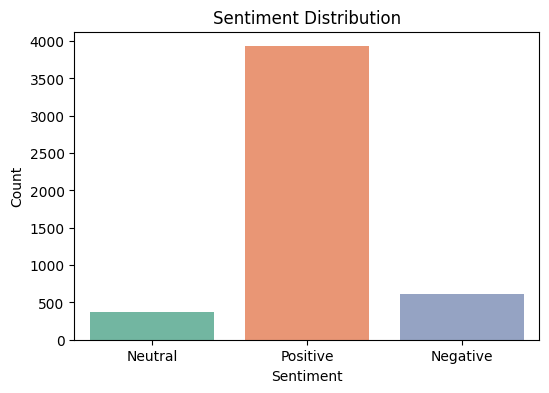

In [32]:
### 1. Bar Plot for Sentiment Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=subset, hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Conclusion : If you are analyzing customer reviews for a  Amazon product and see that most reviews are positive, you can conclude that the product is well-received and satisfies most customers.

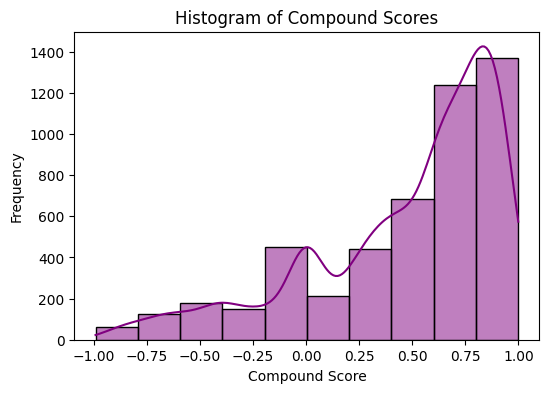

In [34]:
### 2. Histogram of Compound Scores

plt.figure(figsize=(6, 4))
sns.histplot(subset['Score'], bins=10, kde=True, color='purple')
plt.title('Histogram of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

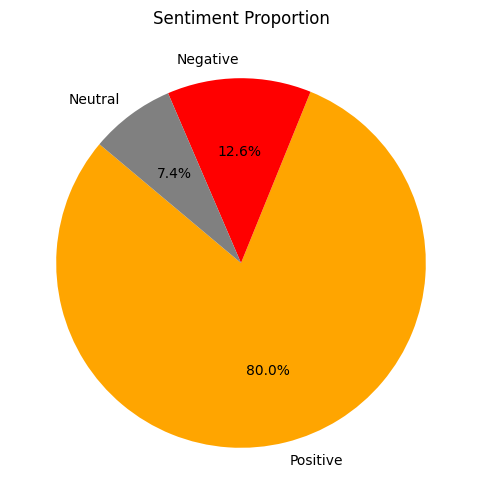

In [35]:
### 4. Pie Chart for Sentiment Proportions

# Count the number of occurrences for each sentiment
sentiment_counts = subset['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['orange', 'red', 'gray'], startangle=140)
plt.title('Sentiment Proportion')
plt.show()

 ## Conclusion : 
## (i) With 80% of the reviews being positive, it's clear that the majority of customers are highly satisfied with the products. This indicates that the product is meeting or exceeding expectations for a significant portion of the user base.
## (ii) The 12.6% negative sentiment suggests that while there are some dissatisfied customers, the proportion of negative feedback is relatively low. However, it’s important to investigate the specific reasons behind the negative reviews (e.g., defective products, unmet expectations, or poor customer service) to identify areas for improvement.

## Final Conclusion :
## The sentiment analysis indicates that the majority of the feedback is positive, with a significantly smaller portion being negative or neutral. This suggests that the products of Amazon under analysis is generally well-received and has a high level of approval or satisfaction among the target audience. Efforts should be focused on maintaining this positive sentiment while addressing the relatively few negative comments to further improve the overall perception."